In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('adult.data', header=None)

# Preprocessing

## Data Cleaning

In [3]:
# rename columns
columns = ['age', 'workclass', 'final_weight', 'education', 'education_num',
           'marital_status', 'occupation', 'relationship', 'race',
           'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
           'native_country', 'income']
df.columns=columns

In [4]:
# Continuous vs. Discrete independent variables
columns_cont = ['age', 'capital_gain', 'capital_loss', 'hours_per_week']
columns_dis = ['workclass', 'education_num', 'occupation',
               'race', 'sex', 'native_country']

In [5]:
# Remove leading white space in text columns
df.workclass      = df.workclass.str.strip()
df.education      = df.education.str.strip()
df.marital_status = df.marital_status.str.strip()
df.occupation     = df.occupation.str.strip()
df.race           = df.race.str.strip()
df.sex            = df.sex.str.strip()
df.native_country = df.native_country.str.strip()
df.income         = df.income.str.strip()

### Drop duplicates

In [6]:
df.shape

(32561, 15)

In [7]:
# drop 24 duplicate rows
df.drop_duplicates(keep='first', inplace=True)

In [8]:
df.shape

(32537, 15)

### Uncertain of input - values to drop

In [9]:
df.shape

(32537, 15)

In [10]:
# To Drop - uncertain value
uncertain_marital = ['Never-married', 'Widowed', 'Married-AF-spouse']
uncertain_country = ['?', 'South']
uncertain_occupation = ['?']

In [11]:
# Drop rows where marital_status is not relevant
df2 = df[~df.marital_status.isin(uncertain_marital)]

In [12]:
# Removed 11,699 rows
df2.shape

(20854, 15)

In [13]:
# Drop rows where native_country is not relevant
df3 = df2[~df2.native_country.isin(uncertain_country)]

In [14]:
# Removed 423 more rows
df3.shape

(20431, 15)

In [15]:
# Drop rows where occupation is not relevant
df4 = df3[~df3.occupation.isin(uncertain_occupation)]

In [16]:
# Removed 897 more rows
df4.shape

(19534, 15)

In [17]:
# Removing column from original data creation
df4.drop(['final_weight', 'relationship'], axis=1, inplace=True)

/Users/davebletsch/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3982: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
df4.income.value_counts()

<=50K    12602
>50K      6932
Name: income, dtype: int64

In [19]:
df4.replace({'<=50K': '<=85k', '>50K':'>85k'}, inplace=True)

/Users/davebletsch/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [20]:
df4.income.value_counts()

<=85k    12602
>85k      6932
Name: income, dtype: int64

## * df4 contains cleaned, relevant data *

# EDA

In [21]:
# Print value_counts for all discrete independent variables 
for col in columns_dis:
    print(col + ':\n')
    print(df4[str(col)].value_counts())
    print('\n')
    print('Total: ', df4[str(col)].value_counts().sum())
    print('\n')

workclass:

Private             13638
Self-emp-not-inc     2006
Local-gov            1457
Self-emp-inc          919
State-gov             842
Federal-gov           663
Without-pay             9
Name: workclass, dtype: int64


Total:  19534


education_num:

9     6574
10    3972
13    3240
14    1204
11     934
12     678
7      504
6      487
15     448
4      408
5      301
16     301
3      198
8      166
2       98
1       21
Name: education_num, dtype: int64


Total:  19534


occupation:

Craft-repair         3119
Exec-managerial      3108
Prof-specialty       2730
Sales                2176
Adm-clerical         1984
Other-service        1421
Machine-op-inspct    1349
Transport-moving     1214
Farming-fishing       681
Handlers-cleaners     643
Tech-support          569
Protective-serv       479
Priv-house-serv        58
Armed-Forces            3
Name: occupation, dtype: int64


Total:  19534


race:

White                 17185
Black                  1512
Asian-Pac-Islander      5

In [22]:
# To classify dependent variable
neg_marital_status = ['Divorced', 'Separated', 'Married-spouse-absent']

In [23]:
# Positive marriage outcome
married = df4.marital_status == 'Married-civ-spouse'
not_married = df4.marital_status.isin(neg_marital_status)

In [24]:
# Check if filtering worked
print(df4[not_married].marital_status.value_counts())
print('')
print(df4[married].marital_status.value_counts())

Divorced                 4206
Separated                 937
Married-spouse-absent     369
Name: marital_status, dtype: int64

Married-civ-spouse    14022
Name: marital_status, dtype: int64


## Binary Encoding of categorical data

#### marital_status

In [25]:
df4.loc[df4.marital_status.isin(neg_marital_status), 'marital_status'] = 0
df4.loc[df4.marital_status == 'Married-civ-spouse', 'marital_status'] = 1

/Users/davebletsch/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [26]:
df4.marital_status.value_counts()

1    14022
0     5512
Name: marital_status, dtype: int64

Move cleaned dataset to a new workbook

In [27]:
df4.head()

,age,workclass,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,50,Self-emp-not-inc,Bachelors,13,1,Exec-managerial,White,Male,0,0,13,United-States,<=85k
2,38,Private,HS-grad,9,0,Handlers-cleaners,White,Male,0,0,40,United-States,<=85k
3,53,Private,11th,7,1,Handlers-cleaners,Black,Male,0,0,40,United-States,<=85k
4,28,Private,Bachelors,13,1,Prof-specialty,Black,Female,0,0,40,Cuba,<=85k
5,37,Private,Masters,14,1,Exec-managerial,White,Female,0,0,40,United-States,<=85k


In [28]:
df4.to_csv('marriage.csv')

# Visualizations

### Target Variable

Target Variable
marital_status
0     5512
1    14022
Name: marital_status, dtype: int64


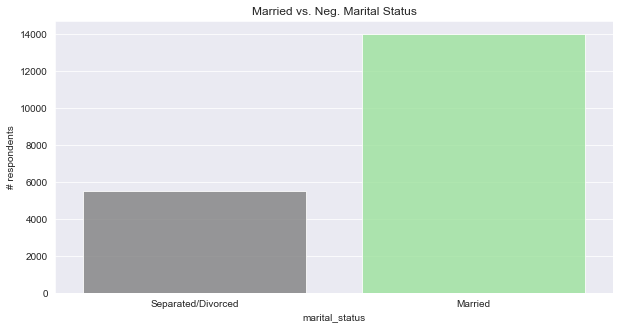

In [29]:
# Favorable Marriage Count
print('Target Variable')
print(df4.groupby(['marital_status']).marital_status.count())

# Target Variable Countplot
sns.set_style('darkgrid')
fig_target = plt.figure(figsize = (10,5))
sns.countplot(df4['marital_status'], alpha =.80, palette= ['grey','lightgreen'])
plt.title('Married vs. Neg. Marital Status')
plt.ylabel('# respondents')
plt.xticks(ticks=[0,1], labels=['Separated/Divorced', 'Married'])
plt.show()

## Null Accuracy

In [30]:
# Null accuracy
null_acc = len(df4[not_married])/len(df4)

# Assuming every marriage will end in divorce/separation using this data
# National Average: between 42-45%
print('{:0.2f}'.format(null_acc))

0.28


### Discrete Variables

In [31]:
# Identify categorical features
print('Discrete Variables\n\n')
print(df4.groupby('workclass').workclass.count(), '\n')
print(df4.groupby('education_num').education_num.count(), '\n')
print(df4.groupby('occupation').occupation.count(), '\n')
print(df4.groupby('race').race.count(), '\n')
print(df4.groupby('sex').sex.count(), '\n')
print(df4.groupby('native_country').native_country.count(), '\n')

Discrete Variables


workclass
Federal-gov           663
Local-gov            1457
Private             13638
Self-emp-inc          919
Self-emp-not-inc     2006
State-gov             842
Without-pay             9
Name: workclass, dtype: int64 

education_num
1       21
2       98
3      198
4      408
5      301
6      487
7      504
8      166
9     6574
10    3972
11     934
12     678
13    3240
14    1204
15     448
16     301
Name: education_num, dtype: int64 

occupation
Adm-clerical         1984
Armed-Forces            3
Craft-repair         3119
Exec-managerial      3108
Farming-fishing       681
Handlers-cleaners     643
Machine-op-inspct    1349
Other-service        1421
Priv-house-serv        58
Prof-specialty       2730
Protective-serv       479
Sales                2176
Tech-support          569
Transport-moving     1214
Name: occupation, dtype: int64 

race
Amer-Indian-Eskimo      180
Asian-Pac-Islander      515
Black                  1512
Other                   142
Whit

### Frequency Distributions (discrete variables)

In [32]:
education_range = ['Preschool', '4th grade', '6th grade', '8th grade',
                     '9th grade', '10th grade', '11th grade', '12th grade',
                     'HS-grad', 'Some college', 'Associates - voc', 'Associates - acad',
                     'Bachelors', 'Masters', 'Prof School', 'Doctorate']

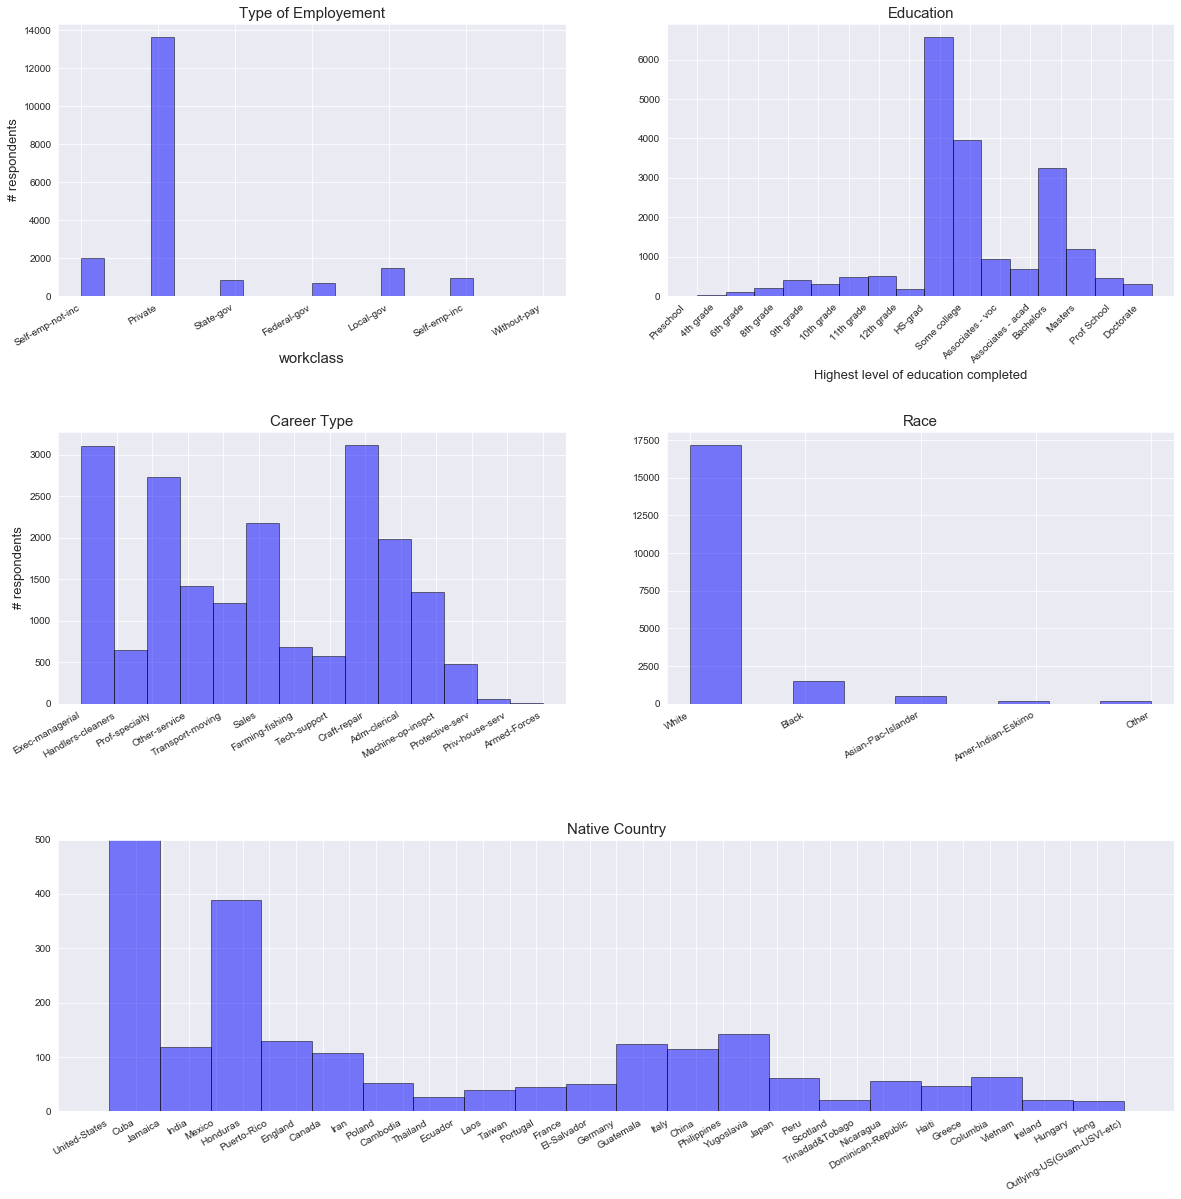

In [33]:
sns.set_style('darkgrid')
fig_discrete = plt.figure(figsize=(20,20))
fig_discrete.subplots_adjust(hspace=.50)

ax1 = fig_discrete.add_subplot(321)
ax1.hist(df4.workclass, bins=20, alpha=.5, edgecolor='black', color='blue')
ax1.set_xlabel('workclass', fontsize = 15)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=30, horizontalalignment='right')
ax1.set_ylabel('# respondents', fontsize = 13)
ax1.set_title('Type of Employement', fontsize = 15)

ax2 = fig_discrete.add_subplot(322)
ax2.hist(df4.education_num, bins=16, alpha=.5, edgecolor='black', color='blue')
ax2.set_xlabel('Highest level of education completed', fontsize = 13)
ax2.set_xticks(np.arange(len(education_range)+1))
ax2.set_xticklabels(education_range)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='center')
ax2.set_title('Education', fontsize = 15)

ax3 = fig_discrete.add_subplot(323)
ax3.hist(df4.occupation, bins=14, alpha=.5, edgecolor='black', color='blue')
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=30, horizontalalignment='right')
ax3.set_ylabel('# respondents',fontsize = 13)
ax3.set_title('Career Type', fontsize = 15)

ax4 = fig_discrete.add_subplot(324)
ax4.hist(df4.race, bins=9, alpha=.5, edgecolor='black', color='blue')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=30, horizontalalignment='right')
ax4.set_title('Race', fontsize = 15)

# ax5 = fig_discrete.add_subplot(325)
# ax5.hist(df4.sex, bins=4, alpha=.5, edgecolor='black', color='blue')
# ax5.set_ylabel('# respondents',fontsize = 13)
# ax5.set_title('Sex', fontsize = 15)

ax6 = fig_discrete.add_subplot(313)
ax6.hist(df4.native_country, bins=20, alpha=.5, edgecolor='black', color='blue')
plt.setp(ax6.xaxis.get_majorticklabels(), rotation=30, horizontalalignment='right')
ax6.set_title('Native Country', fontsize = 15)
ax6.set_ylim(top=500)

plt.show();

# Stacked bar plots to show breakdown per feature

## Discrete Variables

### Race

In [34]:
print('Race Class Summary\n')
race_summary = df4.groupby(['race', 'marital_status']).race.count().unstack()
print(race_summary)

Race Class Summary

marital_status         0      1
race                           
Amer-Indian-Eskimo    72    108
Asian-Pac-Islander   109    406
Black                746    766
Other                 50     92
White               4535  12650


In [35]:
# Create a new df with divorce rate by race
race_counts = pd.DataFrame(df4.race.value_counts())
race_splits = pd.DataFrame(race_summary)
race_counts_df = race_counts.merge(race_splits, left_index=True, right_on='race')

In [36]:
race_counts_df['total'] = race_counts_df.race 

In [37]:
race_counts_df.drop('race', inplace=True, axis=1)

In [38]:
race_counts_df

,0,1,total
race,,,
White,4535,12650,17185
Black,746,766,1512
Asian-Pac-Islander,109,406,515
Amer-Indian-Eskimo,72,108,180
Other,50,92,142


In [39]:
race_counts_df['divorce_rate'] = race_counts_df.loc[:,0]/race_counts_df.loc[:,'total']

In [40]:
race_counts_df

,0,1,total,divorce_rate
race,,,,
White,4535,12650,17185,0.263893
Black,746,766,1512,0.493386
Asian-Pac-Islander,109,406,515,0.211650
Amer-Indian-Eskimo,72,108,180,0.400000
Other,50,92,142,0.352113


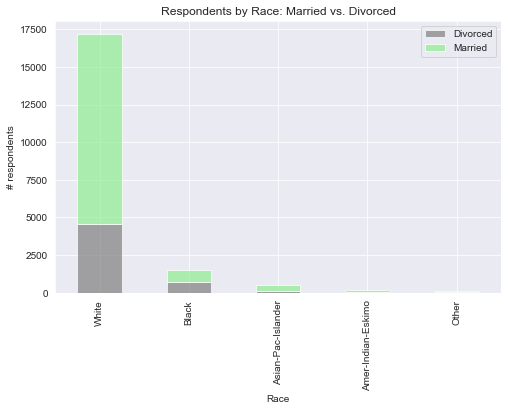

In [41]:
# Changed the order of the x-axis to match the earlier visualizations
race_order = ['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']

race_married = df4.groupby(['race','marital_status']).race.count().unstack()
r1 = race_married.loc[race_order].plot(kind = 'bar', stacked = True, figsize=(8,5),
                   title = 'Respondents by Race: Married vs. Divorced', 
                   color = ['grey','lightgreen'], alpha = .70)

r1.set_xlabel('Race')
r1.set_ylabel('# respondents')
r1.legend(['Divorced','Married'])
plt.show()

### Native Country

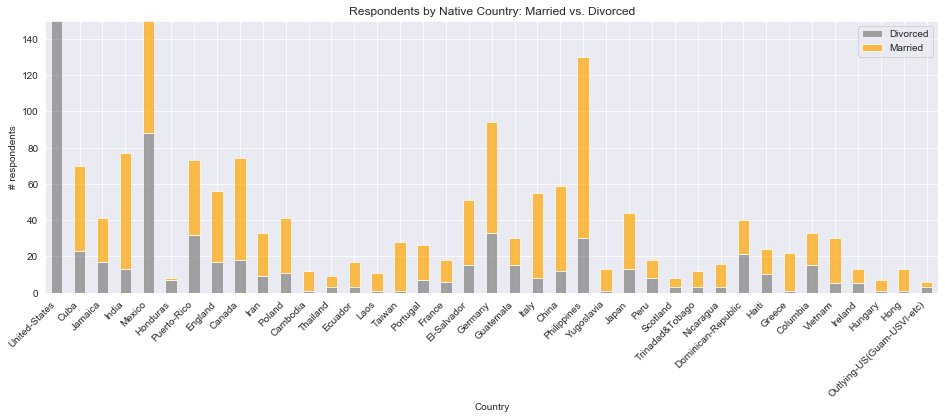

In [42]:
# Changed the order of the x-axis to match the earlier visualizations
country_order = df4.native_country.unique()

country_married = df4.groupby(['native_country','marital_status']).native_country.count().unstack()
c1 = country_married.loc[country_order].plot(kind = 'bar', stacked = True, figsize=(16,5),
                   title = 'Respondents by Native Country: Married vs. Divorced', 
                   color = ['grey','orange'], alpha = .70)

c1.set_xlabel('Country')
c1.set_xticklabels(country_order, rotation=45, ha='right')
c1.set_ylabel('# respondents')
c1.set_ylim(top=150)
c1.legend(['Divorced','Married'])
plt.show()

In [43]:
country_counts = pd.DataFrame(df4.native_country.value_counts())
country_splits = pd.DataFrame(country_married)
country_counts_df = country_counts.merge(country_splits, left_index=True, right_on='native_country')
country_counts_df['total'] = country_counts_df.native_country

In [44]:
country_counts_df['divorce_rate'] = country_counts_df.loc[:,0]/country_counts_df.loc[:,'total']

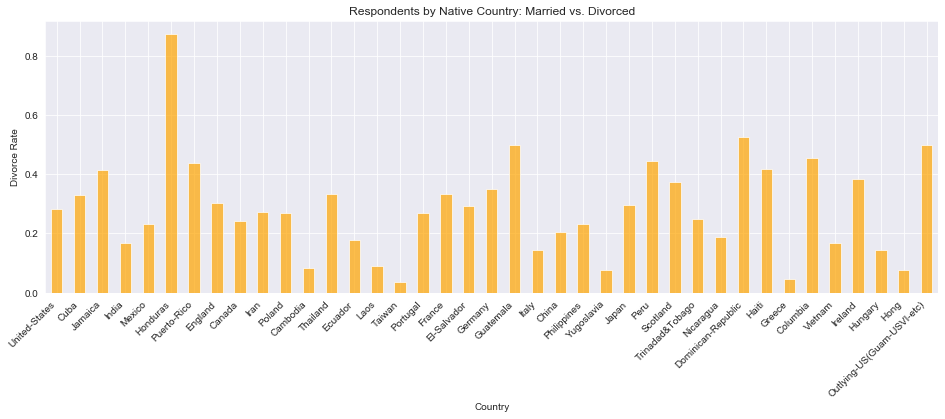

In [45]:
# Changed the order of the x-axis to match the earlier visualizations
country_order = df4.native_country.unique()

c2 = country_counts_df['divorce_rate'].loc[country_order].plot(kind = 'bar', figsize=(16,5),
                   title = 'Respondents by Native Country: Married vs. Divorced', 
                   color = ['orange'], alpha = .70)

c2.set_xlabel('Country')
c2.set_xticklabels(country_order, rotation=45, ha='right')
c2.set_ylabel('Divorce Rate')
plt.show()

Huge spikes in divorce rates likely due to small sample size (Honduras: n=8). 

Consider:
- grouping geographic regions together
- grouping prominant religions together

In [46]:
country_counts_df.drop('native_country', axis=1, inplace=True)

In [47]:
# Above average rates of divorce
country_counts_df[country_counts_df.divorce_rate >= .29].sort_values('divorce_rate')

,0,1,total,divorce_rate
native_country,,,,
El-Salvador,15,36,51,0.294118
Japan,13,31,44,0.295455
England,17,39,56,0.303571
Cuba,23,47,70,0.328571
Thailand,3,6,9,0.333333
France,6,12,18,0.333333
Germany,33,61,94,0.351064
Scotland,3,5,8,0.375000
Ireland,5,8,13,0.384615


In [48]:
country_counts_df[country_counts_df.divorce_rate >= .29].sort_values('divorce_rate')

,0,1,total,divorce_rate
native_country,,,,
El-Salvador,15,36,51,0.294118
Japan,13,31,44,0.295455
England,17,39,56,0.303571
Cuba,23,47,70,0.328571
Thailand,3,6,9,0.333333
France,6,12,18,0.333333
Germany,33,61,94,0.351064
Scotland,3,5,8,0.375000
Ireland,5,8,13,0.384615


In [51]:
# Respondents from El Salvador, England, Cuba, Germany, Puerto-Rico 
# all have above average rate of divorce with more than 50 respondents
country_counts_df[country_counts_df.total > 50].sort_values('divorce_rate')

,0,1,total,divorce_rate
native_country,,,,
Italy,8,47,55,0.145455
India,13,64,77,0.168831
China,12,47,59,0.203390
Philippines,30,100,130,0.230769
Mexico,88,293,381,0.230971
Canada,18,56,74,0.243243
United-States,5049,12792,17841,0.283000
El-Salvador,15,36,51,0.294118
England,17,39,56,0.303571


In [50]:
latin_american = ['Cuba', 'Mexico', 'Honduras', 'Puerto-Rico', 'Ecuador',
                  'El-Salvador', 'Guatemala', 'Peru', 'Nicaragua',
                  'Dominican-Republic', 'Haiti', 'Columbia']

In [56]:
df5 = df4.replace(latin_american, 'Latin-America')
df5.head()

,age,workclass,education,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,50,Self-emp-not-inc,Bachelors,13,1,Exec-managerial,White,Male,0,0,13,United-States,<=85k
2,38,Private,HS-grad,9,0,Handlers-cleaners,White,Male,0,0,40,United-States,<=85k
3,53,Private,11th,7,1,Handlers-cleaners,Black,Male,0,0,40,United-States,<=85k
4,28,Private,Bachelors,13,1,Prof-specialty,Black,Female,0,0,40,Latin-America,<=85k
5,37,Private,Masters,14,1,Exec-managerial,White,Female,0,0,40,United-States,<=85k


In [64]:
country_married2 = df5.groupby(['native_country','marital_status']).native_country.count().unstack()
country_counts2 = pd.DataFrame(df5.native_country.value_counts())
country_splits2 = pd.DataFrame(country_married2)
country_counts_df2 = country_counts2.merge(country_splits2, left_index=True, right_on='native_country')

In [66]:
country_counts_df2['total'] = country_counts_df2.native_country

In [68]:
country_counts_df2.drop('native_country', axis=1, inplace=True)

In [70]:
country_counts_df2['divorce_rate'] = country_counts_df2.loc[:,0]/country_counts_df2.loc[:,'total']

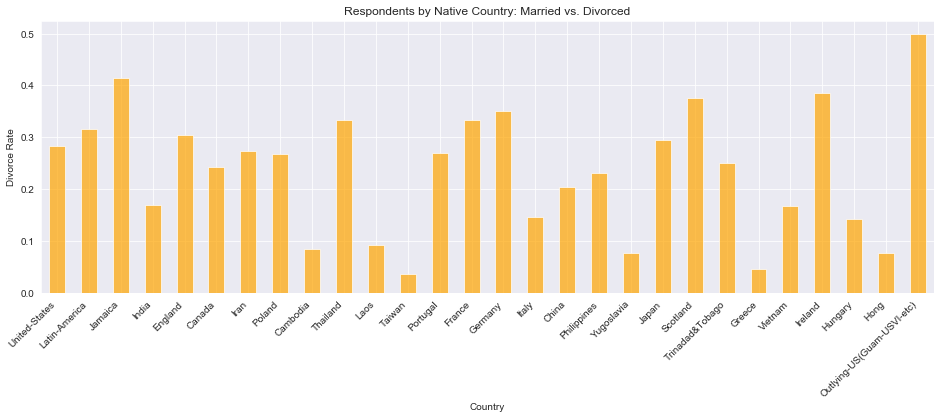

In [71]:
# Changed the order of the x-axis to match the earlier visualizations
country_order2 = df5.native_country.unique()

c3 = country_counts_df2['divorce_rate'].loc[country_order2].plot(kind = 'bar', figsize=(16,5),
                   title = 'Respondents by Native Country: Married vs. Divorced', 
                   color = ['orange'], alpha = .70)

c3.set_xlabel('Country')
c3.set_xticklabels(country_order2, rotation=45, ha='right')
c3.set_ylabel('Divorce Rate')
plt.show()

### Education

#### Group 'HS-grad' and less together

In [ ]:
educ_map = {i:9 for i in range(1,9)}

In [ ]:
df4.replace({'education_num': educ_map}, inplace=True)

In [ ]:
df4.education_num.value_counts()

In [ ]:
# Changed the order of the x-axis to match the earlier visualizations
educ_order = ['HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']

educ_married = df4.groupby(['education_num','marital_status']).education_num.count().unstack()
e1 = educ_married.plot(kind = 'bar', stacked = True, figsize=(16,5),
                   title = 'Respondents by Education Level: Married vs. Divorced', 
                   color = ['grey','tomato'], alpha = .70)

e1.set_xlabel('Highest Level of Education Completed')
e1.set_xticklabels(educ_order, rotation=30, ha='right')
e1.set_ylabel('# respondents')
e1.legend(['Divorced','Married'])
plt.show()

In [ ]:
educ_counts = pd.DataFrame(df4.education_num.value_counts())
educ_splits = pd.DataFrame(educ_married)
educ_counts_df = educ_counts.merge(educ_splits, left_index=True, right_on='education_num')
educ_counts_df['total'] = educ_counts_df.education_num

In [ ]:
educ_counts_df.drop('education_num', axis=1, inplace=True)

In [ ]:
educ_counts_df['divorce_rate'] = educ_counts_df.loc[:,0]/educ_counts_df.loc[:,'total']

In [ ]:
educ_counts_df

FREAKONOMICS stat from 'How to Live Longer' (Jan 09, 2012)

In [ ]:
e2 = educ_counts_df['divorce_rate'].plot(kind = 'bar', figsize=(16,5),
                   title = 'Respondents by Education: Married vs. Divorced', 
                   color = ['tomato'], alpha = .70)

e2.set_xlabel('Highest Level of Education Completed')
e2.set_xticklabels(education_range, rotation=45, ha='right')
e2.set_ylabel('Divorce Rate')
plt.show()

## Continuous Variables

### Age and Hours worked per week (continuous variables)

In [ ]:
# people are working more than 40 hours per week
# 99 hours/week is probably a code in the data dictionary
df4.boxplot(['age', 'hours_per_week'], showfliers=False);


### Capital Gains

In [ ]:
fig_capital = plt.figure(figsize=(14,6))

ax1 = fig_capital.add_subplot(121)
ax1 = df4[df4.capital_gain > 0].boxplot('capital_gain', showfliers=False)
ax1.set_title('ONLY POSITIVE\nCapital Gains')
print('Subset of {} out of {} total observations,\nwho have positive investment income.'.format(df4[df4.capital_gain > 0].count()[0], len(df)))

ax2 = fig_capital.add_subplot(122, sharey=ax1)
ax2 = df4.boxplot('capital_gain', showfliers=False)
ax2.set_title('Capital Gains\nof all Respondents');

### Capital Loss

In [ ]:
fig_capital_loss = plt.figure(figsize=(14,6))

ax1 = fig_capital_loss.add_subplot(121)
ax1 = df4[df4.capital_loss > 0].boxplot('capital_loss', showfliers=False)
ax1.set_title('ONLY POSITIVE\nCapital Loss')
print('Subset of {} out of {} total observations,\nwho have lost money on investments.'.format(df4[df4.capital_loss > 0].count()[0], len(df)))

ax2 = fig_capital_loss.add_subplot(122, sharey=ax1)
ax2 = df4.boxplot('capital_loss', showfliers=False)
ax2.set_title('Capital Loss\nof all Respondents');